# **Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)**

## **Instrucciones**

**Entregable:** Análisis y Reporte sobre el desempeño del modelo.

1. Escoge una de las 2 implementaciones que tengas y genera un análisis sobre su desempeño en un set de datos. Este análisis lo deberás documentar en un reporte con indicadores claros y gráficas comparativas que respalden tu análisis.
2. El análisis debe de contener los siguientes elementos:
  1. Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).
  2. Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto
  3. Diagnóstico y explicación el grado de varianza: bajo medio alto
  4. Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt
3. Basándote en lo encontrado en tu análisis utiliza técnicas de regularización o ajuste de parámetros para mejorar el desempeño de tu modelo y documenta en tu reporte cómo mejoró este.

## **Acerca de los datos...**

Elegí este dataset "**Marvel Superhero Movies**" debido a que me intrigó un poco el desempeño de las películas de superhérores, en concreto las de Marvel, debido a que estas actualmente se encuentran en un gran declive y si las comparamos con las películas de hace no muchos años, presentaban mejores resultados en cuanto a recaudaciones y opiniones populares. Para este entregable, se utilizará el archivo **"Marvel_Movies.csv"**, y he optado por elegir los datos relacionados a las ganancias generadas durante el fin de semana de apertura y el segundo fin de semana, ya que en primera instancia debe existir una relación en base al recibimiento del público durante la primera semana y la segunda. El enlace a la página de dónde se obtuvieron los datos es <a href="https://www.kaggle.com/datasets/joebeachcapital/marvel-movies">el siguiente</a>.

### **¿Qué se espera hacer con este dataset?**

Dentro del dataset se encuentran múltiples variables (19 para ser exactos) que se podrían utilizar para una variedad de análisis y estimaciones, es este se incluyen registros como:

1. **film:** Nombre de la película.
2. **category:** Ctegoría de la película. En concreto se refiere a si la película pertenece a un subconjunto de películas, como una trilogía o una saga (Avengers, Captain America, IronMan, Thor, etc.).
3. **worldwide gross (m):** Recaudación mundial bruta de la película en millones de dólares.
4. **% budget recovered:** Porcentaje de presupuesto recuperado de la película.
5. **critics % score:** Porcentaje del puntaje de la película según los críticos.
6. **audience % score:** Porcentaje del puntaje de la película según la audicencia.
7. **audience vs critics % deviance:** Porcentaje que representa la diferencia entre los porcentajes de la opinión de la crítica y la audiencia.
8. **budget:** Presupuesto de la película en millones de dólares.
9. **domestic gross (m):** Recaudación total recibida por todos los sectores de la economía estadounidense generada por la película.
10. **international gross (m):** Recaudación total recibida por todos los sectores de la economía internacional generada por la película.
11. **opening weekend (m)**: Recaudación de la película durante el primer fin de semana de estreno en millones de dólares.
12. **second weekend (m):** Recaudación de la película durante el segundo fin de semana en millones de dólares.
13. **1st vs 2nd weekend drop off:** Porcentaje de caída en la recaudación entre el primer y segundo fin de semana.
14. **% gross from opening weekend:** Porcentaje de la recaudación total de la película que proviene del primer fin de semana de estreno.
15. **% gross from domestic:** Porcentaje de la recaudación total de la película que proviene del mercado doméstico.
16. **% gross from international:** Porcentaje de la recaudación total de la película que proviene del mercado internacional.
17. **% budget opening weekend:** Porcentaje del presupuesto de la película gastado en el primer fin de semana de estreno.
18. **year:** Año de lanzamiento de la película.
19. **source:** Fuente de los datos o información sobre la película.

De todos los datos descritos, existen múltiples combinaciones que se podrían realizar tomando algunos datos como variables de entrada y otros de salida y generar predicciones en base a ello. Habiendo establecido estos puntos, planeo generar una predicción o estimación de datos con uso de regresión entre la primera y segunda semana de recaudación ($MUSD). Esto con el fin de poner en práctica los conocimientos adquiridos durante estas semanas de clases acerca de modelos de Machine Learning, además de que quiero realizarlo con pocos datos para que el algoritmo me sea un poco más sencillo de manejar. Adicional a ello, se realizará la **evaluación**, **análisis** y **reporte** del mismo modelo con respecto a su **desempeño** y su respectivo **refinamiento**.

## **Análisis y Reporte sobre el Desempeño del Modelo**

A lo largo de este reporte estaré analizando el rendimiento de mi algoritmo de redes neuronales que desarrollé para la entrega Momento de Retroalimentación. *"Módulo 2. Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución"*, en la cual se realizó la implementación de un modelo de Machine Learning (en mi caso redes neuronales) con un método de regresión, dicho modelo hace uso de la base de datos de películas de Marvel llamado "Marvel Superhero Movies" mencionada en el punto anterior.

Este entregable será muy parecido al anterior, sin embargo se ahondará en los siguientes puntos:

* **Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).**
* **Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto**
* **Diagnóstico y explicación el grado de varianza: bajo medio alto**
* **Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt**


## **Antes de empezar**
Lo primero que debemos hacer es cargar los datos (listas) y librerías, esto incluye el framework con el que se trabajará, en este caso es SciKitLearn. Para ello, debemos:

Ejecutar esta celda solo si estas utilizando Google Colab. Se deberá subir el archivo CSV a nuestro Drive y montarlo dentro de Colab:

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importar bibliotecas

Para este entregable ahora podemos implementar más de las librerías que se encuentran relacionadas con implementación de modelos de Machine Learning, en este caso usaremos SKLearn para implementar redes neuronales:

In [15]:
# Importamos tensorflow como herramienta de apoyo para la implementación de keras y scikitLearn
import tensorflow as tf
# Importamos Keras
from tensorflow import keras
# Importamos GridSearch para aplicarlo al refinamiento del modelo
from sklearn.model_selection import GridSearchCV
# Importamos la funcion train_test_split() para dividir los datos de entrada
from sklearn.model_selection import train_test_split
# Importamos la función de StandardScaler para estandarizar los datos de entrada
from sklearn.preprocessing import StandardScaler
# Importamos las funciones de mean_squared_error y mean_absolute_error para evaluar el rendimiento del modelo posterior a la predicción
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

# Importamos librerías adicionales para el tratamiento y proyección de los datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from keras.regularizers import l2
import itertools

Colocamos la ruta dónde se encuentra el archivo CSV y cargamos los datos:

In [16]:
# Editar el path de ser necesario
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Marvel_Movies.csv')

## Extraemos los datos de interés y los dividimos por segmentos

Empezando por la separación del dataset, esto lo podemos ver reflejado desde la implementación del código. Este proceso se lleva a cabo con la implementación de las siguientes herramientas:

In [17]:
# Extraemos las columnas con datos para generar una predicción:
# Lista con todos los valores de la variable independiente
X = data[['opening weekend ($m)'][:len(data)//2]]
# Lista con todos los valores de la variable dependiente
y = data[['second weekend ($m)'][:len(data)//2]]

# Dividimos los datos en sets de entrenamiento, validación y pruebas
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Estandarizamos los datos de pruebas y validación
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Básicamente train_test_split es una función encargada de separa datos de forma aleatoria, con el fin de obtener 2 o más subsets de un mismo conjunto de datos. Después de extraer los datos del archivo “Marvel_Movies.csv”:

### **Training Set**

El set de entrenamiento este compuesto de las variables X_train y y_train. Estas dos son utilizadas dentro de la sección de entrenamiento, que sirve para que el modelo puedo probar algunos valores iniciales, entienda un poco del contexto de la situación y en base a ello pueda empezar a generar algunas cuántas predicciones que, con cada iteración, reduzca el valor del error lo más posible y esto le permita posteriormente proporcionar resultados coherentes y predicciones certeras.

### **Validation Set**

El set de validación este compuesto de las variables X_val y y_val. Estas dos son utilizadas dentro de la sección de entrenamiento, que sirve para que el modelo puedo ser evaluado con una sección de los datos originales y medir qué tan bueno es su rendimiento.

### **Test Set**

El set de pruebas esta compuesto de las variables X_test y y_test. Estas dos son utilizadas dentro de la sección de predicciones, la cual consiste en que, en base al entrenamiento ya validación realizados previamente, el modelo empiece a recibir valores de entrada (X_test) sin recibir los valores de salida (y_test), generando predicciones por si mismo, claro que se espera que teniendo un buen entrenamiento y un MSE pequeño, el rango de error de las pruebas sea de igual forma pequeño y muy preciso en comparación con los datos reales (y_test).

## Construimos la Red Neuronal
El modelo se conforma de 4 capas, la capa de entrada conformada de 25 neuronas, 50 para la segunda, 70 para la tercera y una última de la capa de salida:

In [18]:
model = keras.Sequential([
    keras.layers.Dense(25, activation='tanh', input_shape=(1,)), # Capa de entrada con 25 neuronas, función de activación "tanh" y una variable de entrada
    keras.layers.Dense(50, activation='tanh'), # Segunda Capa con 50 neuronas y una función de activación "tanh"
    keras.layers.Dense(70, activation='relu'), # Tercer capa con 70 neuronas y una función de activación "relu"
    keras.layers.Dense(1) # Capa de salida con una neurona
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

## Entrenamos el modelo
Entrenamos la red neuronal con el set de entrenamiento de datos. Después de probar distintos tipos de variables, encontré que por lo menos el batch_size tiene que ser pequeño y 100 iteraciones son necesarias para obtener un buen resultado (evidentemente con la configuración previamente determinado):

### Análisis de la Complejidad, Grado del Bias o Sesgo y Varianza del entrenamiento

En este apartado se busca exponer el rendimiento del modelo mediante su complejidad, su nivel de bias (sesgo) y varianza, determinando si se trata de bias bajo, medio o alto. Para ello tenemos la opción de realizar un análisis de curvas de aprendizaje, el cuál nos permitirá determinar de forma más precisa la complejidad del modelo. Este lo realizaremos entrenando el modelo por subsecciones tanto del set de entrenamiento como el de validación:

Fraction 10.0% - Training Error: 4511.705078125, Validation Error: 1299.1932373046875
Fraction 20.0% - Training Error: 389.3236083984375, Validation Error: 545.3781127929688
Fraction 30.0% - Training Error: 288.71563720703125, Validation Error: 635.0086059570312
Fraction 40.0% - Training Error: 237.02357482910156, Validation Error: 665.843017578125
Fraction 50.0% - Training Error: 284.9088134765625, Validation Error: 858.4246215820312
Fraction 60.0% - Training Error: 191.69778442382812, Validation Error: 1000.68994140625
Fraction 70.0% - Training Error: 195.21209716796875, Validation Error: 927.7160034179688
Fraction 80.0% - Training Error: 131.0426483154297, Validation Error: 719.1486206054688
Fraction 90.0% - Training Error: 86.40342712402344, Validation Error: 555.8792724609375
Fraction 100.0% - Training Error: 83.07047271728516, Validation Error: 289.39453125


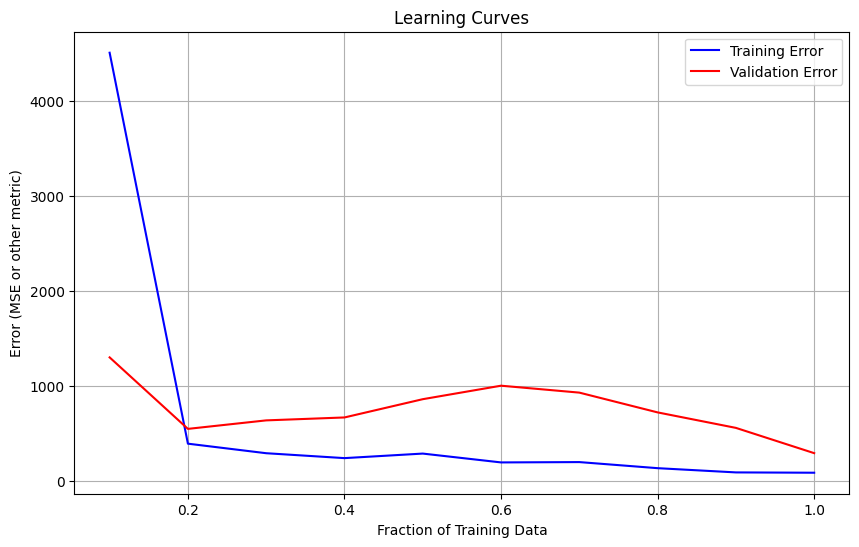

In [19]:
# Definimos una lista de fracciones para dividir los datos de entrenamiento a utilizar (10%, 20%, ...)
fractions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Inicializamos arreglos para guardar las métricas de rendimiento
train_errors = []
val_errors = []

# Iteramos sobre las diferentes divisiones de los datos de entrenamiento
for fraction in fractions:
  # Calculamos el número de muestras a utilizar
  num_samples = int(fraction * X_train_scaled.shape[0])

  # Creamoss subsets de los datos de entrenamiento
  X_subset = X_train_scaled[:num_samples]
  y_subset = y_train[:num_samples]

  # Entrenamos el modelo con el subset
  model.fit(X_subset, y_subset, epochs=100, batch_size=4, verbose=0)

  # Evaluamos el modelo con ambos datos de entrenamiento y validación
  train_loss = model.evaluate(X_subset, y_subset, verbose=0)
  val_loss = model.evaluate(X_val_scaled, y_val, verbose=0)

  print(f'Fraction {fraction * 100}% - Training Error: {train_loss}, Validation Error: {val_loss}')

  train_errors.append(train_loss)
  val_errors.append(val_loss)

# Graficamos las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(fractions, train_errors, 'b', label='Training Error')
plt.plot(fractions, val_errors, 'r', label='Validation Error')
plt.title('Learning Curves')
plt.xlabel('Fraction of Training Data')
plt.ylabel('Error (MSE or other metric)')
plt.legend()
plt.grid(True)
plt.show()

En base a lo que podemos observar en la gráfica, lo primero que destaca es la forma de las líneas que no son curvas. Esto se puede deber a que son muy pocos datos los que se están evaluando, fluctuaciones como estas no son raras de encontrar en líneas de aprendizaje. Otros factores que aún no podemos afirmar ni contradecir son que exista posible ruido dentro de los datos lo que se encuentre ocasionando este tipo de comportamiento. Un último factor a mencionar es qu el modelo puede ser muy complejo y que esto pueda estar afectando el rendimiento, lo cual no es muy probable a pesar de que se están utilizando redes neuronales, el algoritmo solo toma en cuenta una variable de entrada, una de salida y no existe mayor complejidad que 2 capas ocultas (tal vez la cantidad de neuronas por capa produzcan algún tipo de efecto sobre el rendimiento del modelo) y una de salida, con un número de iteraciones bastante decente y un batch size bajo; en realidad no exige mucho como se podría llegar a pensar.

Si queremos obtener conclusiones de la gráfica anterior, debemos fijarnos bien en el comportamientos de estas lineas. El error en entrenamiento empieza en un valor muy alto, para luego decrecer de forma abrupta para la segunda muestra de entrenamiento, y decrece muy poco hasta la última muestra considerada. Por otro lado, la línea que representa el error en validación de igual forma empieza en un valor alto (no tanto como el error en entrenamiento), para luego decrecer un poco en la segunda muestra de entrenamiento, luego crece hasta la sexta muestra y vuelve a bajar para la última.

## ¿Qué complejidad tiene el modelo?

A pesar de las irregularidades y en base a la descripción anterior, es posible determinar que el comportamiento inicial para ambos casos (entrenamiento y validación) sugieren que el model puede ser algo complejo para la cantidad de datos que se están evaluando, esto por lo rápido que llega a aprender de los datos de entrenamiento, pero lucha por generalizar para datos invisibles, un indicador de posible overfitting.

El incremento en el error de validación entre la segunda y sexta muestra indican overfitting. El modelo puede estar capturando ruido desde los datos de entrenamiento, que produce que no se generalice bien. Por último, debido al decrecimiento en el error de validación para la última muestra sugiere que con un dataset más extenso, el modelo empezaría a generalizar mejor los datos.

En base a lo mencionado anteriormente, podemos concluir que el modelo lidia con problemas de **overfitting**, particularmente, con el tamaño del dataset inicial. Sin embargo, el modelo empieza a mejorar un poco su generalización conforme el dataset crece poco a poco. Aún con todo esto podemos afirmar con claridad que el modelo posee un bias (o sesgo) **bajo**. De ser alto, el modelo no debería de ser capaz de ajustarse cerca de las primeras muestras, ya que un modelo con alto bias se reduce a realizar suposiciones simplistas y no puede capturar las verdaderas relaciones entre los datos, cosa que no ocurre en este caso. Para esto nos podemos basar en las siguientes gráficas que consideran regresión logística:

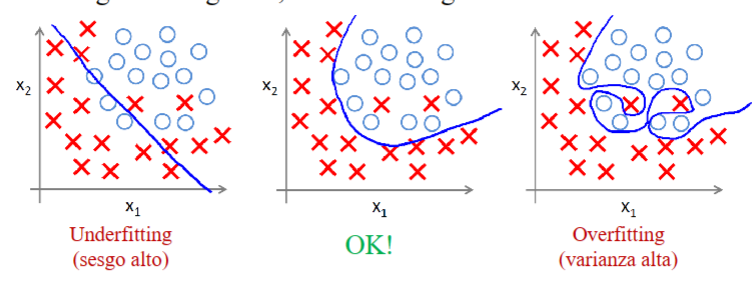

Por otro lado, la varianza se hace bastante presente. Sabemos de antemano que teniendo overfitting, los modelos de Machine Learning tienden a presentar un alto grado de varianza; suelen presentar buenos resultados con los errores de entrenamiento, pero suelen presentar un pobre desempeño o datos invisibles (bastante ruido) en cuanto a errores de validación como los obtenidos. n la tabla de abajo podemos ver claramente a lo que me refiero:

| Fraction   | Training Error   | Validation Error   |
|------------|------------------|--------------------|
| 10.0%      | 0.0063           | 727.3596            |
| 20.0%      | 303.1716         | 339.4596            |
| 30.0%      | 223.3130         | 225.8058            |
| 40.0%      | 150.8009         | 304.2777            |
| 50.0%      | 118.8756         | 363.4625            |
| 60.0%      | 103.7065         | 390.3351            |
| 70.0%      | 90.0036          | 398.5243            |
| 80.0%      | 85.5678          | 384.1024            |
| 90.0%      | 74.7957          | 416.9494            |
| 100.0%     | 74.5245          | 301.7179            |

### Definimos una función para el refinamiento del modelo
Decidí cambiar la cantidad de neuronas de la primera capa a una para obtener mejores resultados y reducir el ruido que esto pueda estar ocasionando:

In [37]:
def create_model(neurons_layer2, neurons_layer3, epochs, batch_size):
    model = keras.Sequential([
        keras.layers.Dense(1, activation='tanh', input_shape=(1,)),
        keras.layers.Dense(neurons_layer2, activation='tanh'),
        keras.layers.Dense(neurons_layer3, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### Definición de función para crear modelos refinados
Creamos el modelo de TensorFlow como un estimador de scikitLearn

### Definimos el grid que contendrá los distinos valores a probar

En mi caso decidí probar variar la cantidad de neuronas por capa del modelo de redes neuronales, la cantidad de iteraciones y el batch_size a considerar del set de datos por iteración:

In [46]:
param_grid = {
    'neurons_layer2': [40, 50, 60, 70],
    'neurons_layer3': [15, 20, 25, 30],
    'epochs': [80],
    'batch_size': [3, 4, 5]
}

La idea es tomar el mejor modelo que arroje el GridSearch, implementar la técninca de regularización L2, fijar algunos hiperparámetros y variar los que resulten más relevantes o aporten a un modelo más preciso.

### Aplicamos una búsqueda por los mejores hiperparámetros
La razón por la cual ya no se utiizó GridSearch es que este se rompió y algunas funcionalidades se volvieron obsoletas. Por ello opte por aplicar un for loop convencional:

In [47]:
# Inicializa las variables para hacer un seguimiento de los mejores hiperparámetros y la mejor puntuación
mejores_hiperparametros = None
mejor_puntuacion = float('inf')  # Inicializa con un valor alto para problemas de minimización
mse_values = []

# Itera sobre todas las combinaciones posibles de hiperparámetros
combinaciones_parametros = list(itertools.product(*param_grid.values()))

for params in combinaciones_parametros:
    neurons_layer2, neurons_layer3, epochs, batch_size = params

    # Crea el modelo con los hiperparámetros actuales
    modelo = create_model(neurons_layer2, neurons_layer3, epochs, batch_size)

    # Entrena tu modelo (deberías tener tus datos de entrenamiento y validación)
    historial = modelo.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_scaled, y_val), verbose=0)

    # Clculamos el MSE
    val_loss = historial.history['val_loss']
    mse_values.append(val_loss)

    # Evalúa tu modelo (deberías tener tu métrica de evaluación)
    perdida_val = modelo.evaluate(X_val_scaled, y_val)

    # Actualiza los mejores hiperparámetros y la mejor puntuación si el modelo actual es mejor
    if perdida_val < mejor_puntuacion:
        mejor_puntuacion = perdida_val
        mejores_hiperparametros = params

print("Parameter Grid Configuration:")
for key, value in param_grid.items():
    print(f"{key}: {value}")

best_mse_index = mse_values.index(min(mse_values))

# Imprime los mejores hiperparámetros y la mejor puntuación
print("Mejores Hiperparámetros:", mejores_hiperparametros)
print("Mejor Pérdida en Validación:", mejor_puntuacion)
print("MSE durante el entrenamiento:", mse_values[best_mse_index])

1/1 [==============================] - 0s 30ms/step - loss: 54.9529
Parameter Grid Configuration:
neurons_layer2: [40, 50, 60, 70]
neurons_layer3: [15, 20, 25, 30]
epochs: [80]
batch_size: [3, 4, 5]
Mejores Hiperparámetros: (40, 25, 80, 4)
Mejor Pérdida en Validación: 8.696725845336914
MSE durante el entrenamiento: [2865.729736328125, 2852.397705078125, 2838.723876953125, 2824.580078125, 2810.540771484375, 2795.054931640625, 2778.376953125, 2759.859375, 2740.167724609375, 2718.482666015625, 2695.683349609375, 2671.218994140625, 2644.182373046875, 2614.52880859375, 2583.156005859375, 2550.503662109375, 2514.231689453125, 2476.259765625, 2434.418212890625, 2389.340087890625, 2342.0537109375, 2291.858642578125, 2238.207763671875, 2181.39892578125, 2124.746337890625, 2062.382080078125, 1998.2891845703125, 1934.5947265625, 1864.7425537109375, 1795.7080078125, 1723.6817626953125, 1655.9107666015625, 1580.1416015625, 1508.3873291015625, 1435.7666015625, 1363.5711669921875, 1290.796630859375, 

### Refinamos el modelo
De todas las pruebas que realicé de refinamiento, los resultados que mejor rendimiento presentaron están relacionados con los siguientes hiperparámetros:
Best Hyperparameters:
* 'neurons_layer2': 35
* 'neurons_layer3': 15
* 'epochs': 80
* 'batch_size': 3

Best Error Validation Score: 15.9850
MSE: 51.45

En base a lo obtenido con esta implementación de un tipo de GridSearch, realicé varias pruebas para comparar resultados, restringiendo un poco las iteraciones debido a que no suponen alguna mejora significativa al modelo, así que fuera de ese valor, se cambiarán todas las demás variables por valores distintos que se ven reflejados en la siguiente tabla:

Parameter Configuration | Neurons Layer 2 | Neurons Layer 3 | Epochs | Batch Size | Best Hyperparameters | Best Validation Loss | MSE    
------------------------|------------------|------------------|--------|------------|-----------------------|----------------------|--------
1                       | [25, 50, 70]     | [25, 50, 70]     | [80, 100, 120]     | [3, 4, 5]    | (25, 50, 80, 5)      | 3.9394               | 210.23
2                       | [30, 35, 40, 45] | [15, 20, 25, 30] | [80]               | [2, 3, 4]    | (35, 15, 80, 3)      | 15.9850              | 51.45  
3                       | [20, 30, 40, 50] | [10, 20, 30, 40] | [80]               | [2, 3, 4, 5, 6] | (20, 30, 80, 3)      | 7.6173               | 366.79
4                       | [40, 50, 60, 70] | [15, 20, 25, 30] | [80]               | [3, 4, 5]    | (40, 25, 80, 4)      | 8.6967               | 160.186


Al final, concluimos que la prueba realizada de este GridSearch con *51.45* de *MSE* y *15.9850* de *Best Validation Loss* es la que mejor resultados nos arrojó, así que nos quedaremos con esta configuración a partir de ahora.

## Regularizamos el modelo
Finalmente, haremos uso de los datos de prueba con el modelo refinado, además de que incluiremos una regularización l2, que nos permite reducir el overfitting que pueda presentar el modelo. Básicamente añade un término de penalización a la función de pérdida que reduce al modelo de asignar pesaos excesivamente largos a sus parámetros. Básicamente se traduce como la suma de lso cuadrados de todos los parámetros del modelo y es añadido a la función de pérdida durante el entrenamiento.

### Declaramos el modelo
Al final decidí sí modificar el hiperparámetro de epoch para conseguir mejores resultados, esto debido a pruebas experiemntales que elaboré:

* ***Prueba 1***

    0.01653 <br/>
    0.76265

    Mean Squared Error (Training): 921.8786010742188

    Mean Squared Error (Testing): 868.6402052680211
    Root Mean Squared Error: 29.47270271400336
    Mean Absolute Error: 24.451236343383787

* ***Prueba 2***

    0.001985 <br/>
    0.005849
    Mean Squared Error (Training): 790.44873046875

    Mean Squared Error (Testing): 789.8115228293846
    Root Mean Squared Error: 28.10358558670734
    Mean Absolute Error: 21.947866058349607

* ***Prueba 3***

    1.5
    3.8

    Mean Squared Error (Training): 560.83056640625

    Mean Squared Error (Testing): 303.18953405870246
    Root Mean Squared Error: 17.412338558008297
    Mean Absolute Error: 12.291107241312664

  Lo que más llamó mi atención fue el comportamiento de los datos de predicción con respecto a lo valores reales:

  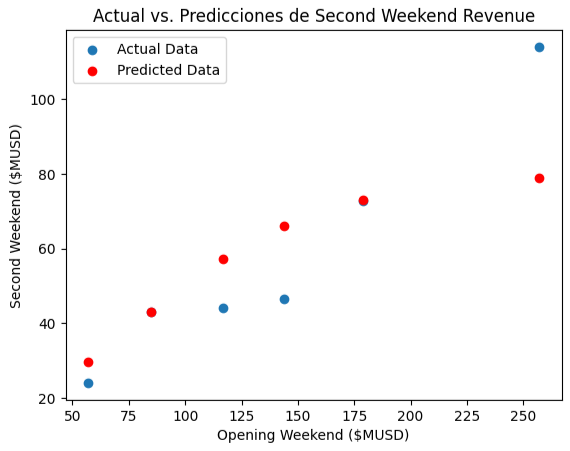

  Al parecer tiende a comportarse como una parábola, claro que no es lo que idealmente se buscaría para esto modelo, pero se me hizo bastante curioso este comportamiento por parte del modelo.

In [119]:
# Creamos el modelo con los parámetros elegidos
model = keras.Sequential([
    keras.layers.Dense(1, activation='tanh', input_shape=(1,)), # Capa de entrada con 25 neuronas, función de activación "tanh" y una variable de entrada
    keras.layers.Dense(35, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.0000003675)), # Segunda Capa con 50 neuronas y una función de activación "tanh"
    keras.layers.Dense(15, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0000000553)), # Tercer capa con 70 neuronas y una función de activación "relu"
    keras.layers.Dense(1) # Capa de salida con una neurona
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [120]:
# Entrenamos el modelo con los parámetros elegidos
model.fit(X_train_scaled, y_train, epochs=80, batch_size=3)

Epoch 1/80
6/6 [==============================] - 1s 3ms/step - loss: 4651.4868
Epoch 2/80
6/6 [==============================] - 0s 3ms/step - loss: 4642.0723
Epoch 3/80
6/6 [==============================] - 0s 3ms/step - loss: 4633.0562
Epoch 4/80
6/6 [==============================] - 0s 4ms/step - loss: 4624.6270
Epoch 5/80
6/6 [==============================] - 0s 3ms/step - loss: 4615.2310
Epoch 6/80
6/6 [==============================] - 0s 3ms/step - loss: 4605.3643
Epoch 7/80
6/6 [==============================] - 0s 3ms/step - loss: 4596.3975
Epoch 8/80
6/6 [==============================] - 0s 4ms/step - loss: 4588.3809
Epoch 9/80
6/6 [==============================] - 0s 3ms/step - loss: 4579.7095
Epoch 10/80
6/6 [==============================] - 0s 3ms/step - loss: 4570.0825
Epoch 11/80
6/6 [==============================] - 0s 4ms/step - loss: 4560.7637
Epoch 12/80
6/6 [==============================] - 0s 3ms/step - loss: 4550.9395
Epoch 13/80
6/6 [====================

In [121]:
# Evaluamos el modelo con los datos de entrenamiento
loss = model.evaluate(X_test_scaled, y_test)

# Desplegamos el Mean Squared Error (MSE)
print("Mean Squared Error:", loss)

1/1 [==============================] - 0s 187ms/step - loss: 344.7434
Mean Squared Error: 344.7433776855469


### Realizamos las predicciones con el subset de pruebas

In [122]:
second_wknd_pred = model.predict(X_test_scaled)
print("Predictions:", second_wknd_pred)

1/1 [==============================] - 0s 68ms/step
Predictions: [[75.310684]
 [22.92602 ]
 [66.46351 ]
 [37.730934]
 [72.48095 ]
 [56.212715]]


### Evaluamos el modelo con las respectivas métricas

In [118]:
# Calculamos las métricas de regresión
mse = mean_squared_error(y_test, second_wknd_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, second_wknd_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 532.6759588937103
Root Mean Squared Error: 23.079773805081157
Mean Absolute Error: 14.780961418151854


### Gráfica de comparación

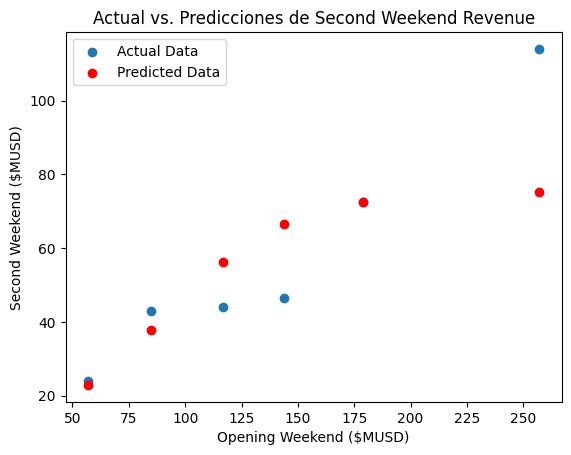

In [123]:
# Graficamos los datos originales
plt.scatter(X_test, y_test, label='Actual Data')

# Graficamos los datos estimados por la red neuronal
plt.scatter(X_test, second_wknd_pred, color='red', label='Predicted Data')

plt.xlabel('Opening Weekend ($MUSD)')
plt.ylabel('Second Weekend ($MUSD)')
plt.title('Actual vs. Predicciones de Second Weekend Revenue')
plt.legend()
plt.show()

##  Conclusiones

Fraction 10.0% - Training Error: 1.6585766077041626, Validation Error: 598.7567138671875
Fraction 20.0% - Training Error: 420.3277893066406, Validation Error: 30.571273803710938
Fraction 30.0% - Training Error: 250.0887908935547, Validation Error: 19.35618782043457
Fraction 40.0% - Training Error: 226.9051971435547, Validation Error: 28.53483009338379
Fraction 50.0% - Training Error: 424.35711669921875, Validation Error: 103.2698974609375
Fraction 60.0% - Training Error: 288.7942810058594, Validation Error: 82.91183471679688
Fraction 70.0% - Training Error: 177.9049835205078, Validation Error: 118.91349029541016
Fraction 80.0% - Training Error: 125.04621124267578, Validation Error: 148.0710906982422
Fraction 90.0% - Training Error: 95.36886596679688, Validation Error: 164.4435272216797
Fraction 100.0% - Training Error: 90.89987182617188, Validation Error: 157.86085510253906


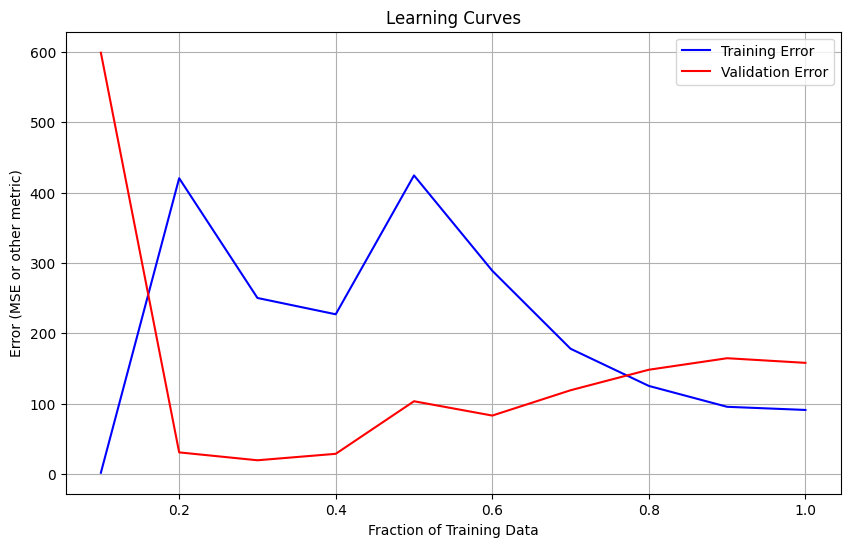

In [124]:
# Definimos una lista de fracciones para dividir los datos de entrenamiento a utilizar (10%, 20%, ...)
fractions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Inicializamos arreglos para guardar las métricas de rendimiento
train_errors = []
val_errors = []

# Iteramos sobre las diferentes divisiones de los datos de entrenamiento
for fraction in fractions:
  # Calculamos el número de muestras a utilizar
  num_samples = int(fraction * X_train_scaled.shape[0])

  # Creamoss subsets de los datos de entrenamiento
  X_subset = X_train_scaled[:num_samples]
  y_subset = y_train[:num_samples]

  # Entrenamos el modelo con el subset
  model.fit(X_subset, y_subset, epochs=100, batch_size=4, verbose=0)

  # Evaluamos el modelo con ambos datos de entrenamiento y validación
  train_loss = model.evaluate(X_subset, y_subset, verbose=0)
  val_loss = model.evaluate(X_val_scaled, y_val, verbose=0)

  print(f'Fraction {fraction * 100}% - Training Error: {train_loss}, Validation Error: {val_loss}')

  train_errors.append(train_loss)
  val_errors.append(val_loss)

# Graficamos las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(fractions, train_errors, 'b', label='Training Error')
plt.plot(fractions, val_errors, 'r', label='Validation Error')
plt.title('Learning Curves')
plt.xlabel('Fraction of Training Data')
plt.ylabel('Error (MSE or other metric)')
plt.legend()
plt.grid(True)
plt.show()

Para concluir con este reporte, considero que se realizaron bastantes prácticas y se utilizaron algunas herramientas muy útiles para evaluar y analizar el desempeño de mi modelo, sin embargo no he logrado refinarlo de la forma en como yo quisiera. Si observamos la gráfica de abajo, este tiende a ser más desastrosa que la primera. Probé bastantes combinaciones de hiperparámetros, no registré todos debido a que no presentaban resultados relevantes o distinos, los más destacados si que los anoté y plasmé en este mismo entregable con el fin de observar el cambio de comportamiento que tiene el modelo al modificar un solo o múltiples valores.

Realmente y aunque existan algunas guías, herramientas y pasos a seguir para refinar un modelo con los mejores atributos que puedas darle es sin duda una tarea muy complicada. Al menos si no logré mejorar mi modelo como tal, puedo decir que identifiqué algunos de los problemas que padece, como poseer bastante overfitting en ciertos puntos clave del mismo (como al inicio), posee un sesgo bajo y una varianza alta, aunque por más que he intentado ajustar los valores del modelo y claramente sigue siendo de poca confianza, los valores que recibo son algo aproximados, es decir, aunque cambie los valores de los hiperparámetros, sospecho que el modelo (así como lo tengo programado con regularización y refinamiento) ha tomado cierto comportamiento que le permite ajustarse siempre de la misma manera, esto se ve reflejado en la gráfica comparativa entre datos reales y datos estimados; se ve como una parábola, y aunque esto no se adapte al modelo al 100%, es algo que no me esperaba ver al momento de experimentar con el algoritmo.